# House Prices : Advanced Regression Techniques(submission2)
## Before get started, I referred to another kernal from Kaggle.
1. Suryanand Singh : https://www.kaggle.com/surya635/house-price-prediction
2. https://www.kaggle.com/surya635/house-price-prediction
3. https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python - He is so

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## EDA

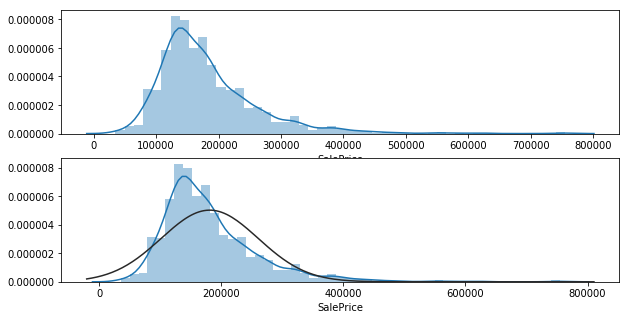

In [134]:
fig, axes = plt.subplots(2,1,figsize = (10,5))
sns.distplot(train['SalePrice'], ax = axes[0]) # 히스토그램 및 kde(커널 밀도 함수, Kernel density function)
sns.distplot(train['SalePrice'], fit = stats.norm, ax = axes[1]) # fit = stats.norm 정규분포(mean, sigma)

In [157]:
(mu, sigma) = stats.norm.fit(train['SalePrice'])
mu, sigma

(180921.19589041095, 79415.29188606751)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

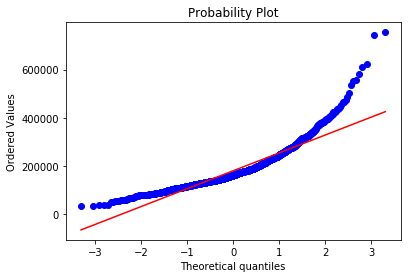

In [158]:
stats.probplot(train['SalePrice'], plot = plt)

Transform this variable to normal distribution.<br>
In this case, we use log.**(but i don't know why use log for normalization yet.)**

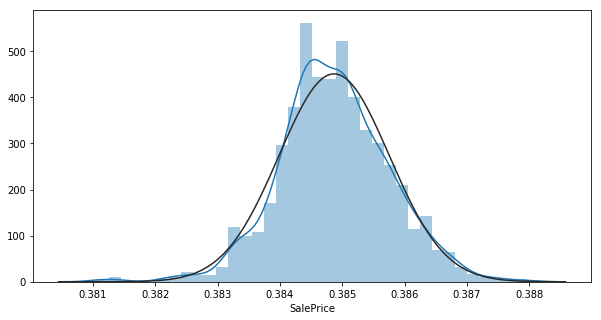

In [165]:
# Apply log to variables
train['SalePrice'] = np.log1p(train['SalePrice'])

# Check if it is applied
plt.figure(figsize = (10,5))
sns.distplot(train['SalePrice'], fit = stats.norm)

In [167]:
(mu, sigma) = stats.norm.fit(train['SalePrice'])
mu, sigma

(0.3848692761803538, 0.0008848882164044675)

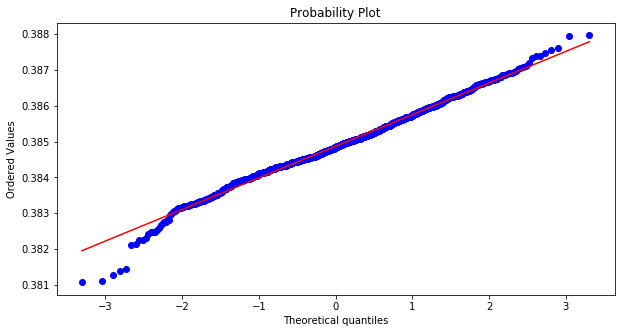

In [172]:
fig = plt.figure(figsize = (10,5))
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

## 배운 개념들
### 1. stats.probplot(data, plot = plt)
 - Calculate quantiles for a probability plot, and optionally show the plot.
 - 확률밀도함수를 plot할 때 위치척도를 계산해주며, plot도 해준다.(다만 plot은 template를 줘야함. ex) plt)
 - probplot optionally calculates a best-fit line for the data 
 - 데이터에 알맞는 최적의 line을 계산해준다. <<< ? 무슨 뜻인지 모르겠음

### 2. boxplot이 무엇을 의미하는지
 - 전형적은 boxplot을 생각해보면 맨 위와 아래는 각각 max, min
 - 그리고 중앙 상자 안에는 밑과 아래에 각각 first quartile, thrid quartile이 존재한다.
 - 마지막으로 상자 중앙 선은 median값을 의미한다.
 - **sns.boxplot일 경우 outliers까지 표시해 줌(점들로 표시)**
 
### 3. sns.pairplot()의 기능(미친 기능이다 이건... seaborn 공부해야할듯)
 - 일단 여러 그래프를 grid형식으로 만들어 줌
 - 두 쌍의 값(x,y - corr 모양처럼)을 이용해서 각각의 correlation을 한 번에 확인할 수 있다.
